In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Sklearn Dataset Make_Regression

In [60]:
X,Y=make_regression(n_samples=100,n_features=1,bias=5,noise=8)#Here noise is  gaussian noise
#in this noise means point is scatter more or variance increase or std dev change from 1 which is std bcz of noising addition

In [61]:
print(X.shape,Y.shape)
print(X[:3],Y[:3],sep='\n')

(100, 1) (100,)
[[-0.45217448]
 [ 0.34789371]
 [-0.04296039]]
[-20.60701204  24.51204873  22.85748025]


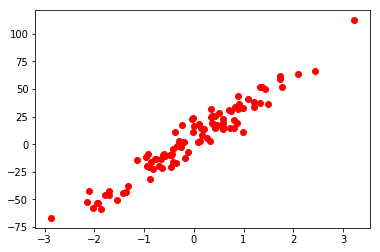

In [62]:
plt.figure()
plt.scatter(X,Y,color="red")

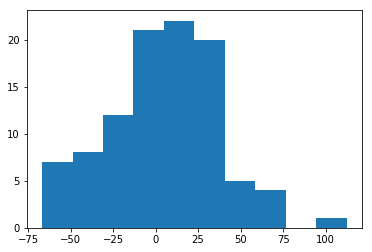

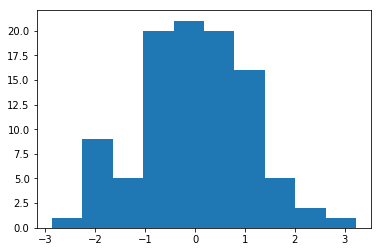

5.17254396534143 5.69178341125819
-0.01888080502898231 1.043692093392089


In [63]:
plt.hist(Y)
plt.show()
plt.hist(X)
plt.show()
print(Y.mean(),Y.std()**0.5)
print(X.mean(),X.std()**0.5)

## Implementation of Univariate Linear Regression

In [67]:
class Univariate_LinearRegression:
    def __init__(self,X,Y):
        self.x=X
        self.y=Y
        self.bias=np.random.random()
        self.coef=np.random.uniform(low=-1,high=1)
        
    def Compute_Loss(self):
        loss=[]
        
        for x,y in zip(self.x,self.y):
            y_cap=self.predict(x)
            diff=(y_cap-y)**2
            loss.append(diff)
            
        loss=np.array(loss)
        return loss.sum()/self.x.shape[0]
    
    def Predict(self,x):
        return self.coef*x+self.bias
    # Gradient Calculation=->y_cap-y or (y_cap-Y)x
    def CalCulate_Gradient(self):
        grad_0=[]
        grad_1=[]
        
        for x,y in zip(self.x,self.y):
            y_cap=self.predict(x)
            grad_0.append(y_cap-y)
            grad_1.append(y_cap-y)*x
            
        grad_0=np.array(grad_0)
        grad_1=np.array(grad_1)
        grad_0=np.sum(grad_0)/self.x.shape[0]
        grad_1=np.sum(grad_1)/self.x.shape[1]
        return(grad_0,grad_1)
        
    def Update_Weight(self,gradient,alpha=0.4):
        self.bias-=alpha*gradient[0]
        self.coef-=alpha*gradient[1]
        
    def Get_All_Pred(self):
        pred=[]
        for x,y in zip(self.x,self.y):
            pred.append(self.Predict(x))
        
        return pred
        
    def Train(X,Y,alpha=0.4,it=10):
        loss=[]
        for _ in range(it):
            grad=self.CalCulate_Gradient()
            self.Update_Weight(gradient,alpha)
            loss.append(self.Compute_Loss())
            
        return loss
    def Gradient_batch(Self,batch_size=0):
        grad_0=[]
        grad_1=[]
        idx=np.arange(0,self.y.shape)
        np.shuffle(idx)
        idx=idx[:batch_size]
        
        for i in idx:
            y_cap=self.Predict(self.x[i])
            grad_0.append(y_cap-y[i])
            grad_1.append(y_cap-y[i])*x[i]
            
        grad_0=np.sum(np.array(grad_0))/len(idx)
        grad_1=np.sum(np.array(grad_1))/len(idx)
        return grad_0 ,grad_1
    
    def Train_batch(X,Y,alpha=0.4,epoch=10,batch_size=0):
        loss=[]
        for _ in range(epoch):
            grad=self.Gradient_batch(batch_size)
            self.Update_Weight(gradient,alpha)
            loss.append(self.Compute_Loss())
            
        return loss